# **Credit Card Fraud Detection**

# <a id='dataset'>Load Data</a>

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
from IPython.display import YouTubeVideo

import pickle
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.26.4
Pandas version : Pandas 2.2.2
Matplotlib version : Matplotlib 3.9.2
Seaborn version : Seaborn 0.13.2
SkLearn version : SkLearn 1.5.1
Plotly version : plotly 5.24.1


## Import the Dataset

In [3]:
df = pd.read_csv('C:/Users/sbson/Downloads/creditcard.csv', encoding='latin_1')

In [5]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()

In [7]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# pd.set_option('display.max_rows',1000)

In [13]:
df.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# <a id='eda'>Exploratory Data Analysis</a>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

**Highlights**

* Dataset contains details of 284807 transactions with 31 features.
* There is no missing data in our dataset, every column contain exactly 284807 rows.
* All data types are float64, except 1: Class 
* All data types are float64, except 1: Class 
* 28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V28
* 3 columns: TIME, AMOUNT and CLASS which can be analysed for various INSIGHTS

## <a id='unique'>Count unique values of label</a>

In [17]:
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

class
0    284315
1       492
Name: count, dtype: int64


class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


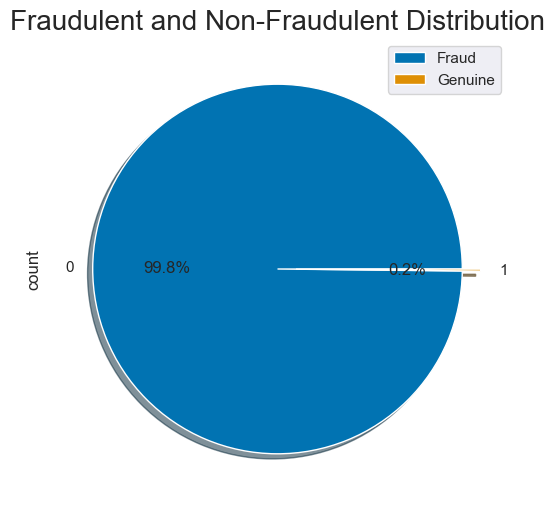

In [19]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

**Highlights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [21]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


**Highlights**
* On an average, credit card transaction is happening at every 94813.86 seconds.
* Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly ** positively skewed**. We will check the distribution graph of the amount to get more clarity.

## <a id='null'>Finding null values</a>

In [23]:
# Dealing with missing data
df.isnull().sum().max()

0

**Highlights**

There are no missing values present in the dataset. It is not necessary that missing values are present in the dataset in the form of  NA, NAN, Zeroes etc, it may be present by some other values also that can be explored by analysing each feature.

## <a id='amountdist'>Distribution of Amount<a id=''>

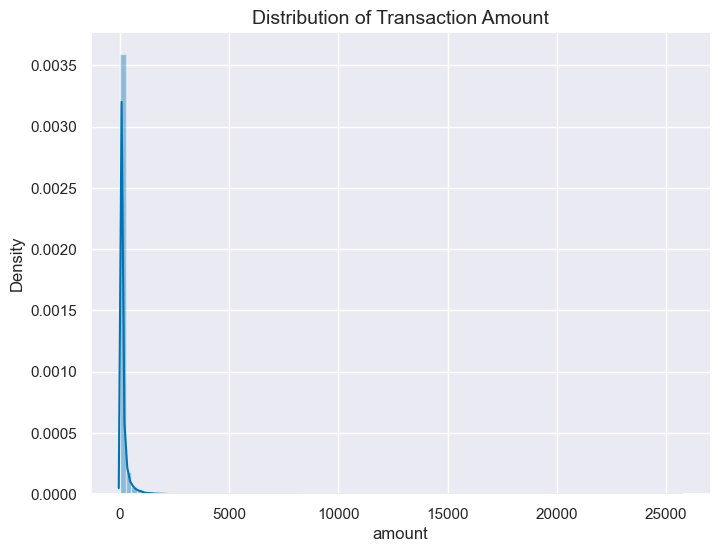

In [113]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.

### Distribution of Amount for Fradulent & Genuine transactions

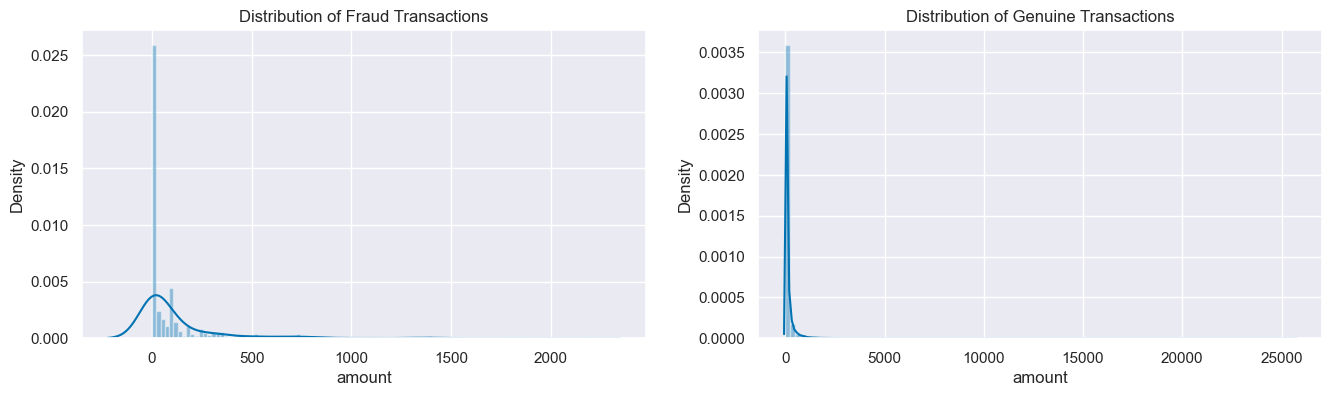

In [25]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

**Highlights**

This graph shows that most of the fraud transaction amount is less than 500 dollars. This also shows that the fraud transaction is very high for an amount near to 0, let's find that amount.

In [27]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


**Highlights**

* There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.
* There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments


In [29]:
print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

Genuine Transaction distribution : 
 amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


### Distribution of Amount w.r.t Class

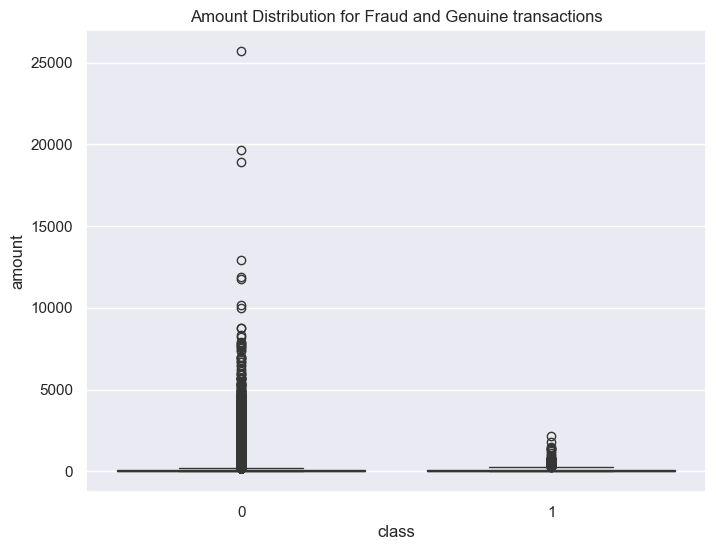

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also, we should be conscious about that these **outliers should not be the fraudulent transaction**. Generally, fraudulent transactions of the very big amount and removing them from the data can make the predicting model bais. 

So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.

## <a id='timedist'>Distribution of Time</a>

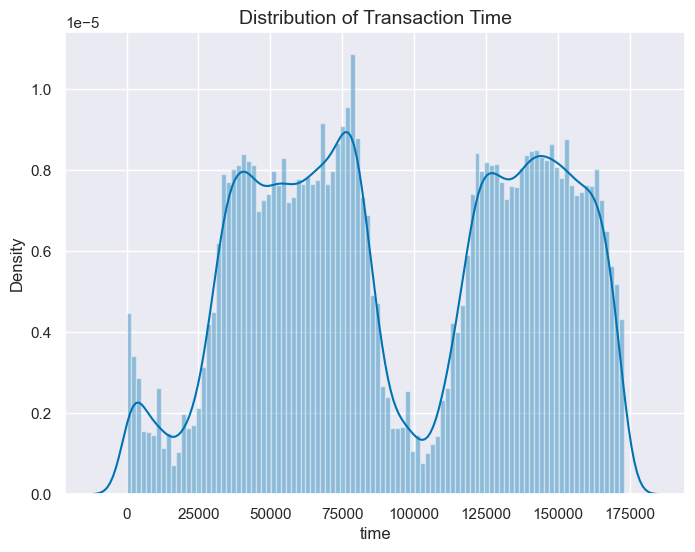

In [33]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

**Highlights**

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

### Distribution of time w.r.t. transactions types

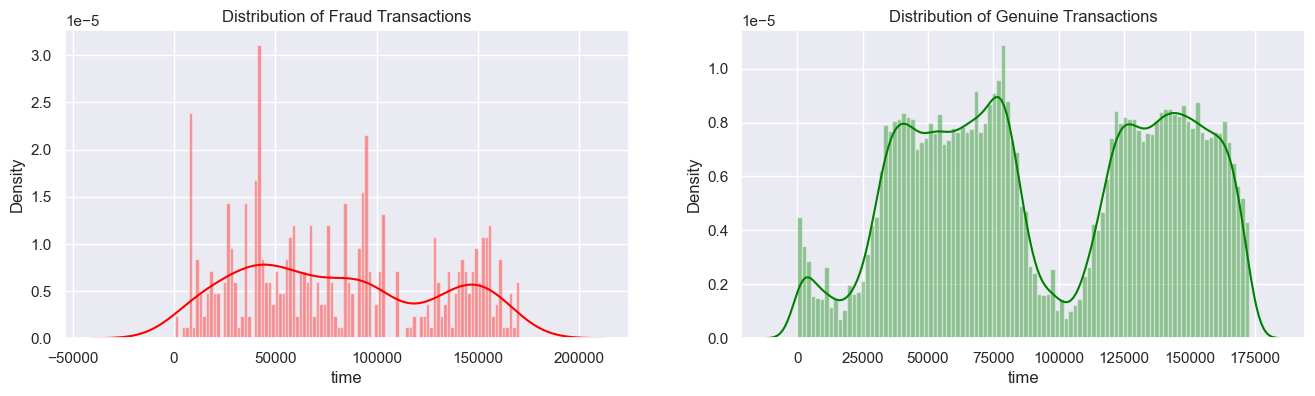

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

### Distribution of transaction type w.r.t amount

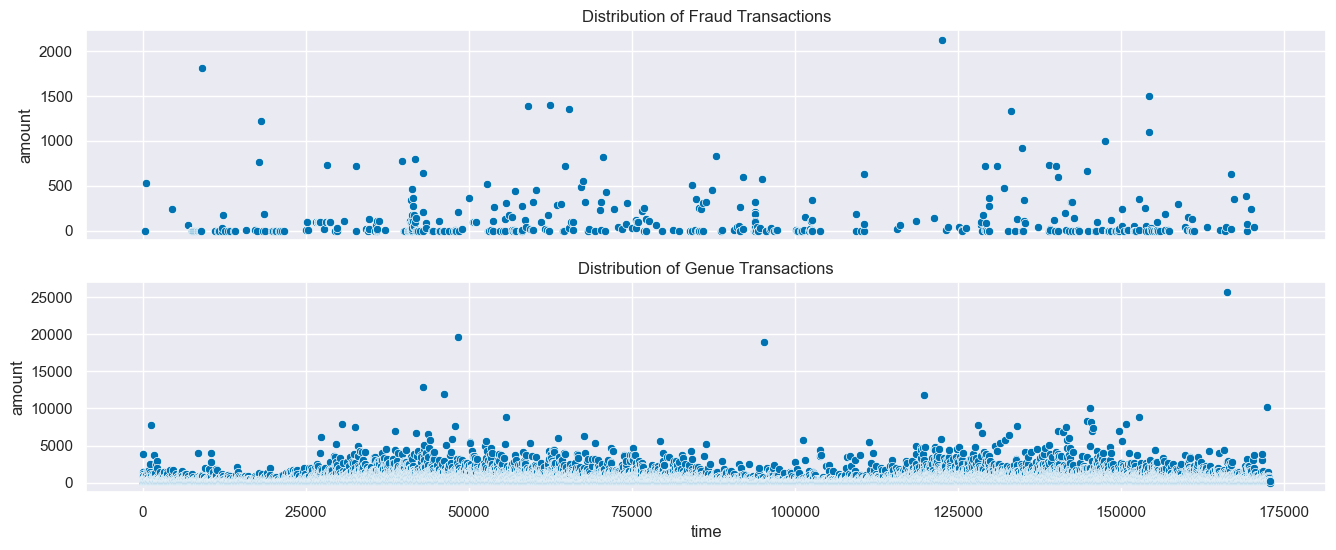

In [37]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='time',y='amount', data=df[df['class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='time',y='amount', data=df[df['class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

## <a id='catcont'>Categorical vs Continuous Features</a>

Finding unique values for each column to understand which column is categorical and which one is Continuous

In [39]:
# Finging unique values for each column
df[['time','amount','class']].nunique()

time      124592
amount     32767
class          2
dtype: int64

In [ ]:
fig = px.scatter(df, x="time", y="amount", color="class", 
                 marginal_y="violin",marginal_x="box", trendline="ols", template="simple_white")
fig.show()

## <a id='corr'>Correlation Among Explanatory Variables</a>
Let's find out top 10 features which are highly correlated with a price.

In [43]:
df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.005632
time     -0.012323
Name: class, dtype: float64

In [ ]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);
plt.show()

**Highlights**

It looks like that no features are highly correlated with any other features.

## Lets check the data again after cleaning

In [45]:
df.shape

(284807, 31)

In [47]:
df['class'].value_counts(normalize=True)

class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

## <a id='timefeateng'>Feature engineering on Time</a>

### Converting time from second to hour

In [49]:
# Converting time from second to hour
df['time'] = df['time'].apply(lambda sec : (sec/3600))

### Calculating hour of the day

In [52]:
# Calculating hour of the day
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

### Calculating First and Second Day

In [55]:
# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [57]:
df[['time','hour','day','amount','class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


### Fraud and Genuine transaction Day wise

In [59]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
day
1    144787
2    140020
Name: count, dtype: int64


No of fraud transaction Day wise:
day
1    281
2    211
Name: count, dtype: int64


No of genuine transactions Day wise:
day
1    144506
2    139809
Name: count, dtype: int64


Percentage of fraud transactions Day wise:
day
1    0.194078
2    0.150693
Name: count, dtype: float64


**Highlights**

* Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

* Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

* Most of the transaction including the fraud transaction happened on day 1.

Let's see the above numbers in the graph.

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['class'] == 1)]['day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['class'] == 0)]['day'], ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")

plt.show()

In [ ]:
# Time plots 
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(df[df['class']==0]['time'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Genuine Transactions')

sns.distplot(df[df['class']==1]['time'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

In [ ]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Genuine Transactions

plt.figure(figsize=(12,10))

sns.distplot(df[df['class'] == 0]["hour"], color='green') # Genuine - green
sns.distplot(df[df['class'] == 1]["hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

**Highlights**

**Above graph shows that most of the Fraud transactions are happening at night time (0 to 7 hours) when most of the people are sleeping and Genuine transaction are happening during day time (9 to 21 hours).**

In [ ]:
plt.figure(figsize=(8,6))
df[['time','hour','day','amount','class']].groupby('hour').count()['class'].plot()
plt.show()

### Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots

Finally visulaising all columns once and for all to observe any abnormality

In [ ]:
df.hist(figsize = (25,25))
plt.show()

## Reset the index

In [135]:
df.reset_index(inplace = True , drop = True)

In [61]:
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df['amount_log'] = np.log(df.amount + 0.0001)

## <a id='scalestand'>Standardization</a>


In [63]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

## <a id='scalenorm'>Normalization</a>


In [65]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['amount_minmax'] = mm.fit_transform(df['amount'].values.reshape(-1,1))

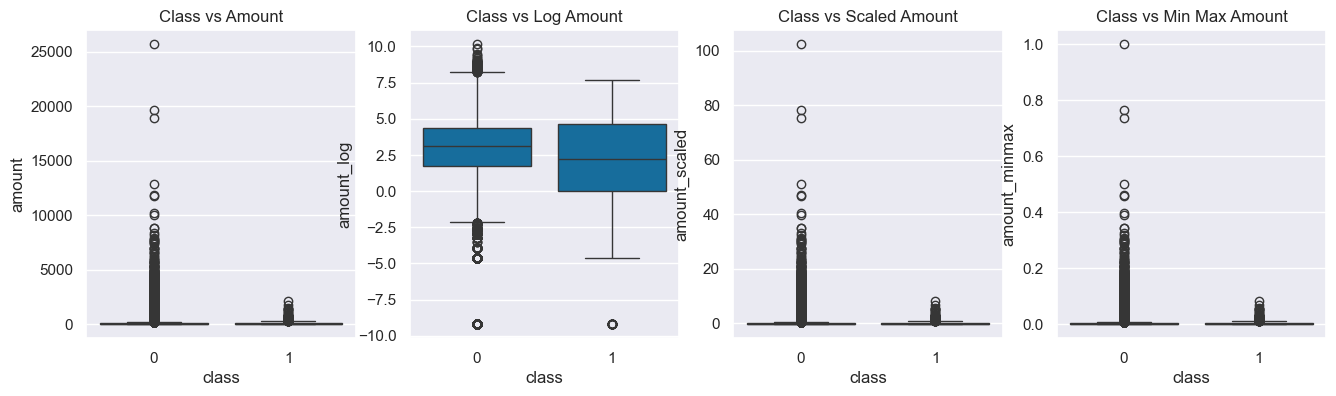

In [67]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="class",y="amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

**Hightlights**

* We can see a slight difference in the log amount of our two Classes. 
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
* **By seeing the above three graphs, I think scaling the amount by log will best suit for our model.**

In [69]:
df[['time','hour','day','amount','amount_log','amount_scaled','amount_minmax','class']]

,time,hour,day,amount,amount_log,amount_scaled,amount_minmax,class
0,0.000000,0,1,149.62,5.008099,0.244964,0.005824,0
1,0.000000,0,1,2.69,0.989578,-0.342475,0.000105,0
2,0.000278,0,1,378.66,5.936639,1.160686,0.014739,0
3,0.000278,0,1,123.50,4.816242,0.140534,0.004807,0
4,0.000556,0,1,69.99,4.248354,-0.073403,0.002724,0
...,...,...,...,...,...,...,...,...
284802,47.996111,23,2,0.77,-0.261235,-0.350151,0.000030,0
284803,47.996389,23,2,24.79,3.210444,-0.254117,0.000965,0
284804,47.996667,23,2,67.88,4.217743,-0.081839,0.002642,0
284805,47.996667,23,2,10.00,2.302595,-0.313249,0.000389,0


# <a id='pickle'>Saving preprossed data as serialized files</a>
* To deploy the predictive models built we save them along with the required data files as serialized file objects
* We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared

In [71]:
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: C:\Users\sbson\Downloads


### Load preprocessed data

In [73]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008099,0.244964,0.005824
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.989578,-0.342475,0.000105
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936639,1.160686,0.014739
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816242,0.140534,0.004807
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248354,-0.073403,0.002724


In [75]:
df.shape

(284807, 36)

In [77]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008099,0.244964,0.005824
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.989578,-0.342475,0.000105
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936639,1.160686,0.014739
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816242,0.140534,0.004807
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248354,-0.073403,0.002724


# <a id='splitdata'>Splitting data into Training and Testing samples</a>

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [80]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_log', 'amount_scaled', 'amount_minmax'],
      dtype='object')

**Highlights**

* We have created few new features like an hour, day, scaled amount. However, these are just for visualization purpose only, not for building the model.

In [83]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['time','class','hour','day','amount','amount_minmax','amount_scaled'],axis=1)
y = df['class']

In [85]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989578
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816242
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.261235
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210444
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217743
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302595


In [87]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [89]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [91]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


# <a id='modelbaseline'>Baseline for models</a>

We will train four types of classifiers and decide which classifier will be more effective in detecting **fraud transactions**.

#### Let's Discuss Next Steps - 

1  __Classification Models__

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier 

2  __Class Imbalance Solutions__

- Under Sampling
- Over Sampling
- SMOTE
- ADASYN

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score

# <a id='modelbuild'>Model Building</a>


# <a id='logreg'>1. Logistic Regression</a>

## <a id='logregim'>1.1 Logistic Regression with imbalanced data</a>

In [94]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [96]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

### Predict from Test set

In [99]:
y_pred = logreg.predict(X_test)

### <a id='modevel'>Model Evolution</a>

In [102]:
from sklearn import metrics

In [104]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.60      0.72       144

    accuracy                           1.00     85443
   macro avg       0.95      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [106]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99922
AUC : 0.80202
Precision : 0.89691
Recall : 0.60417
F1 : 0.72199




In [108]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85346
1       97
Name: count, dtype: int64

**Highlights**

Our model predicted 97 transactions as fraud and 85346 transactions as genuine from the test dataset.

In [111]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

class
0    85299
1      144
Name: count, dtype: int64

**There are originally 144 fraud transactions and our model predicted only 97 fraud transaction. So the accuracy of our model should be ${97}\over{144}$, right?**

In [114]:
97/144

0.6736111111111112

**However, this not the case. Actually there are originally 144 fraud transactions and 85299 genuine transactions in the test dataset. However, our model predicted only 97 fraud transaction. Also, it should be kept in mind that these 97 predicted fraud transaction may not be identified correctly. It means that these predicted 97 fraud transactions are NOT only from 144 originally fraud transaction, but they may also be from genuine transactions as well.**

### Confusion Matrix

In [116]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85289,    10],
       [   57,    87]], dtype=int64)

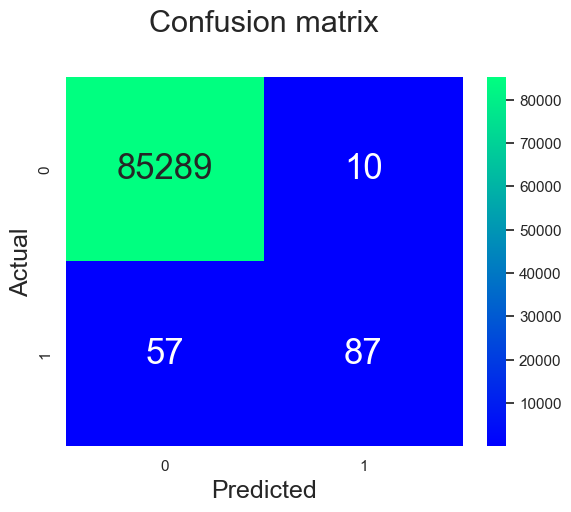

In [118]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

**There are 88 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.**

**True Negative** - 85286 (truely saying negative - genuine transaction correctly identified as genuine)

**True Postive** - 87 (truely saying positive - fraud transaction correctly identified as fraud)

**False Negative** - 57 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

**False Positive** - 10 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

In [121]:
87/144

0.6041666666666666

So, **60.41%** is the real accuracy of our model, which is nothing but the **Recall Score**. So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

In [124]:
metrics.roc_auc_score(y_test , y_pred) 

0.8020247159990151

In [126]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99613819e-01, 3.86180716e-04],
       [9.99851854e-01, 1.48146321e-04],
       [9.99758441e-01, 2.41559334e-04],
       ...,
       [9.99676128e-01, 3.23872329e-04],
       [9.99582703e-01, 4.17297480e-04],
       [9.99837491e-01, 1.62509406e-04]])

AUC -  0.8020247159990151 



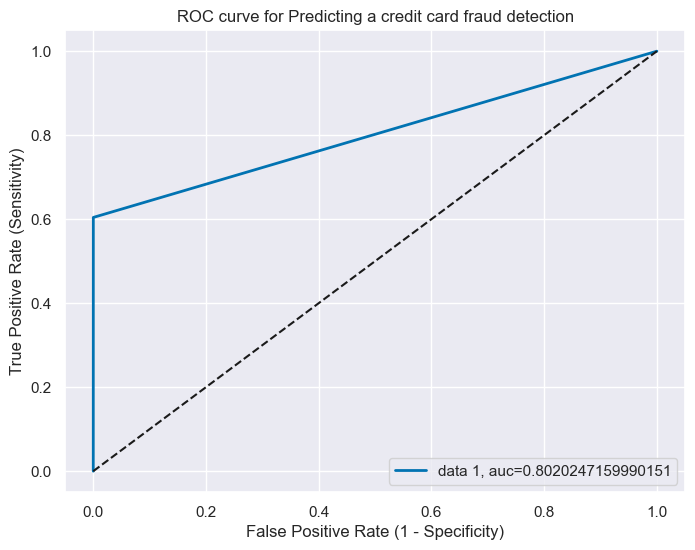

In [128]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.722


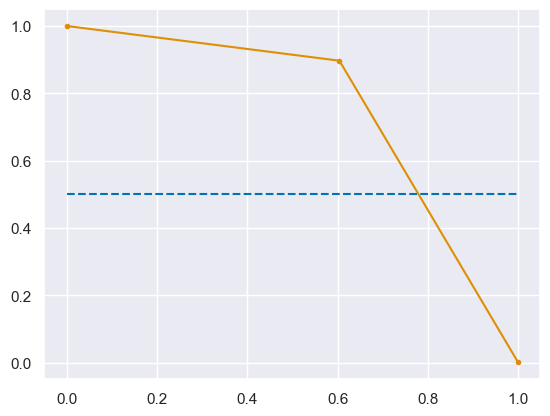

In [130]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

## Import imbalace technique algorithims

In [133]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

## <a id='logregundsamp'>1.2.Logistic Regression with Random Undersampling technique</a>

In [136]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [138]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 348, 1: 348})


In [140]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [142]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.97408
AUC : 0.94195
Precision : 0.05615
Recall : 0.90972
F1 : 0.10577


AUC -  0.9419535740942645 



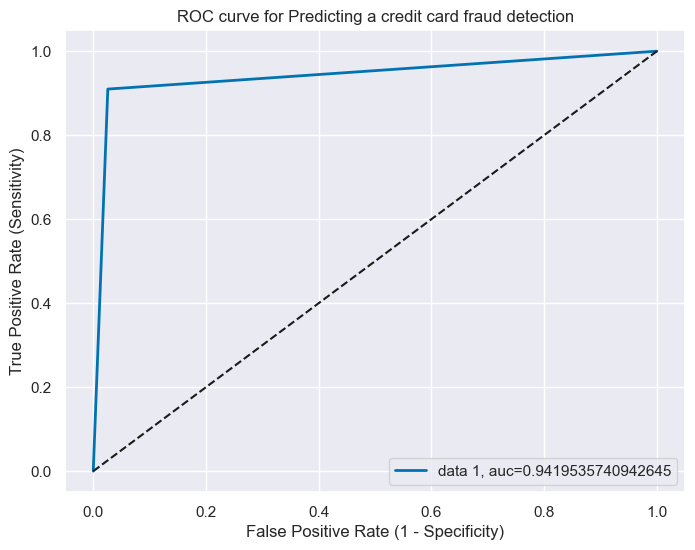

In [144]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.106


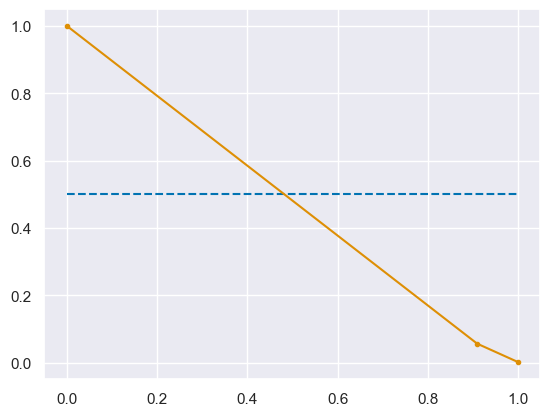

In [146]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

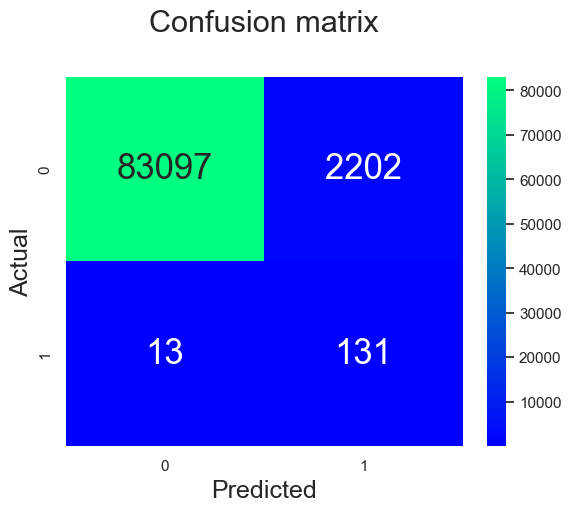

In [148]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

## <a id='logregovrsamp'>1.3.Logistic Regression with Random Oversampling technique</a>

In [150]:
from imblearn.over_sampling import RandomOverSampler

In [152]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [154]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [156]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))

Accuracy :0.97802
AUC : 0.93700
Precision : 0.06476
Recall : 0.89583
F1 : 0.12079


AUC -  0.9369962572832038 



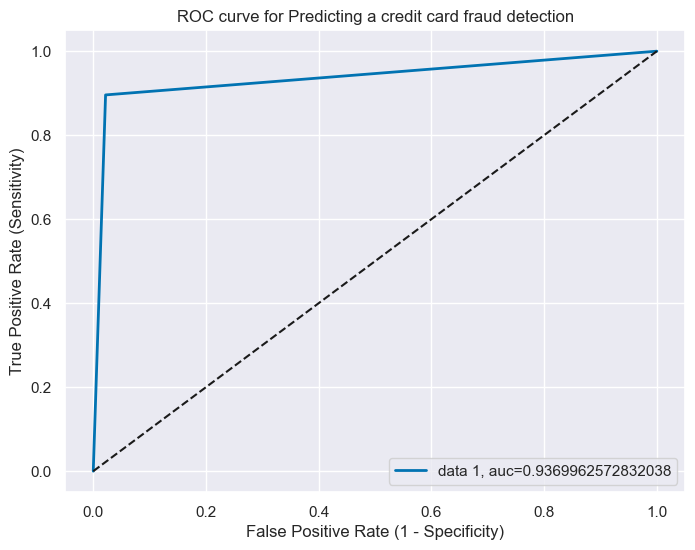

In [158]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.121


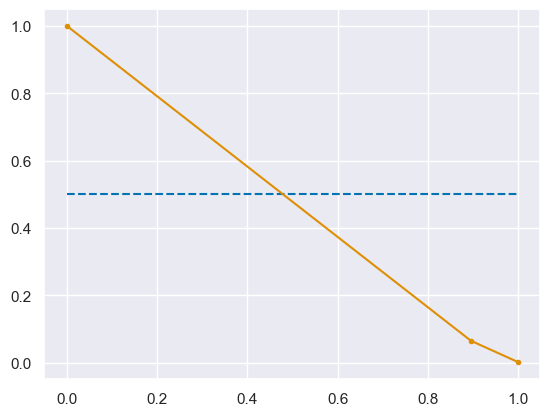

In [160]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

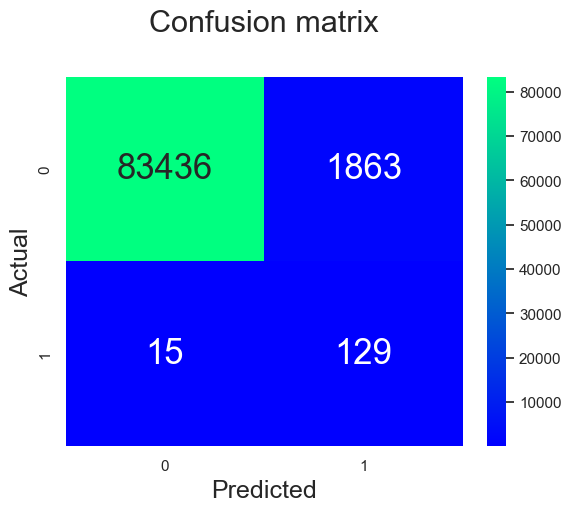

In [162]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

## <a id='logregsomote'>1.4 Logistic Regression with SMOTE data</a>

In [164]:
from imblearn.over_sampling import SMOTE, ADASYN

In [166]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [168]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [170]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.97598
AUC : 0.93598
Precision : 0.05956
Recall : 0.89583
F1 : 0.11169


AUC -  0.9359763156660689 



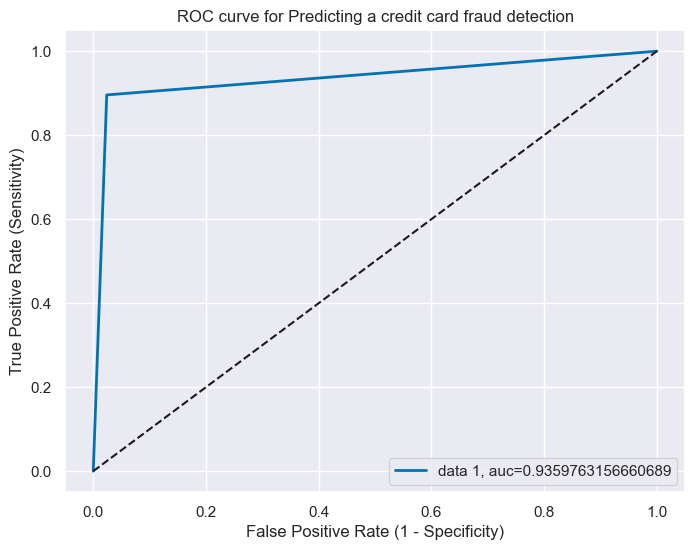

In [172]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.112


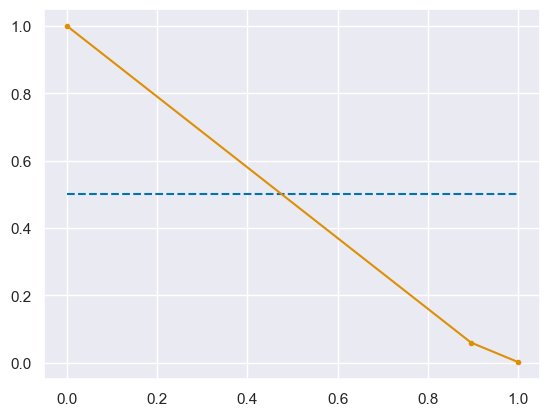

In [174]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

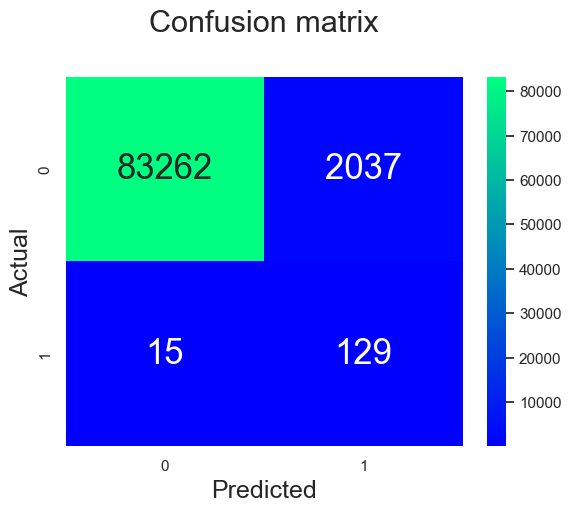

In [176]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

## <a id='logregadasyn'>1.5 Logistic Regression with ADASYN data</a>

In [178]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199012})


In [180]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [182]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.91834
AUC : 0.93155
Precision : 0.01923
Recall : 0.94444
F1 : 0.03768


AUC -  0.9315535156723213 



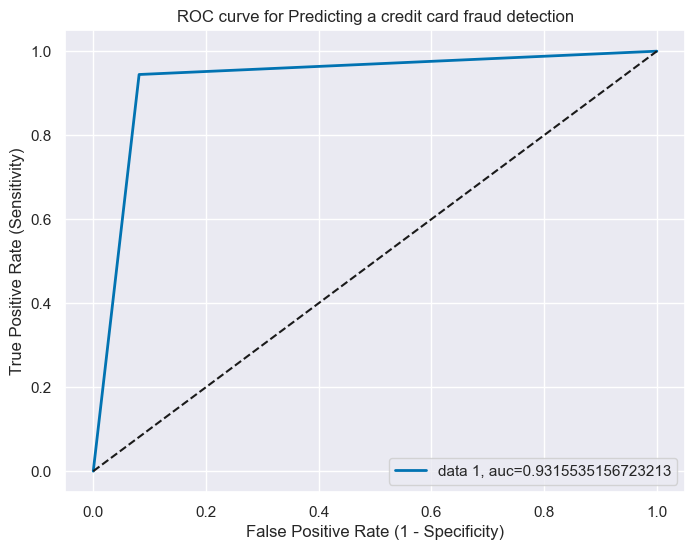

In [184]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.038


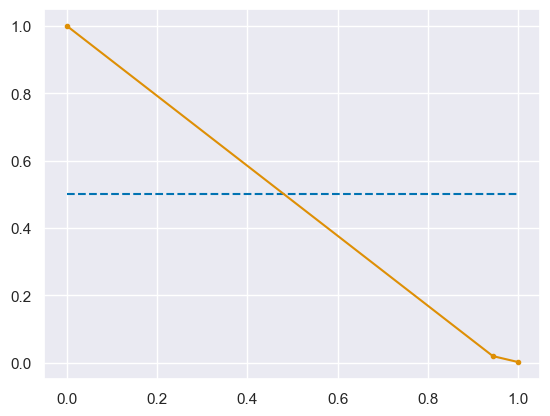

In [186]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

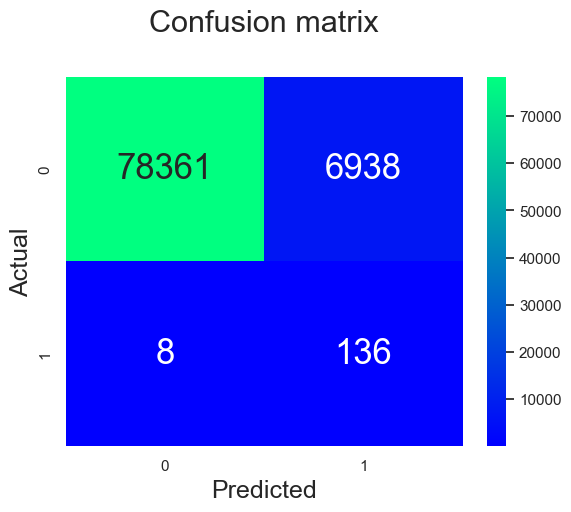

In [188]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

### We have seen that imbalance dataset have Recall score of only 61.11%. It means that creating a model from the imbalanced dataset is highly biased towards genuine transactions and creates a model which is not able to predict the fraudulent transactions correctly. However, the balanced dataset has Recall score of above 94.444%.

# <a id='spatial'>Spatial nature of class imbalance</a>

I will reduce 29 columns to 2 columns with the help of **Principal Component Analysis** so that I can look at them in a plot! (because to plot graph we need two dimensions)

In [190]:
from sklearn.decomposition import PCA

##  <a id='distimbds'>Distribution of balaced dataset</a>

Finally, we can create a scatter plot of the dataset and colour the examples for each class a different colour to clearly see the spatial nature of the class imbalance.

A scatter plot of the dataset is created showing the large mass of points that belong to the minority class (red) and a small number of points spread out for the minority class (blue). We can see some measure of overlap between the two classes.

In [192]:
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X_train)

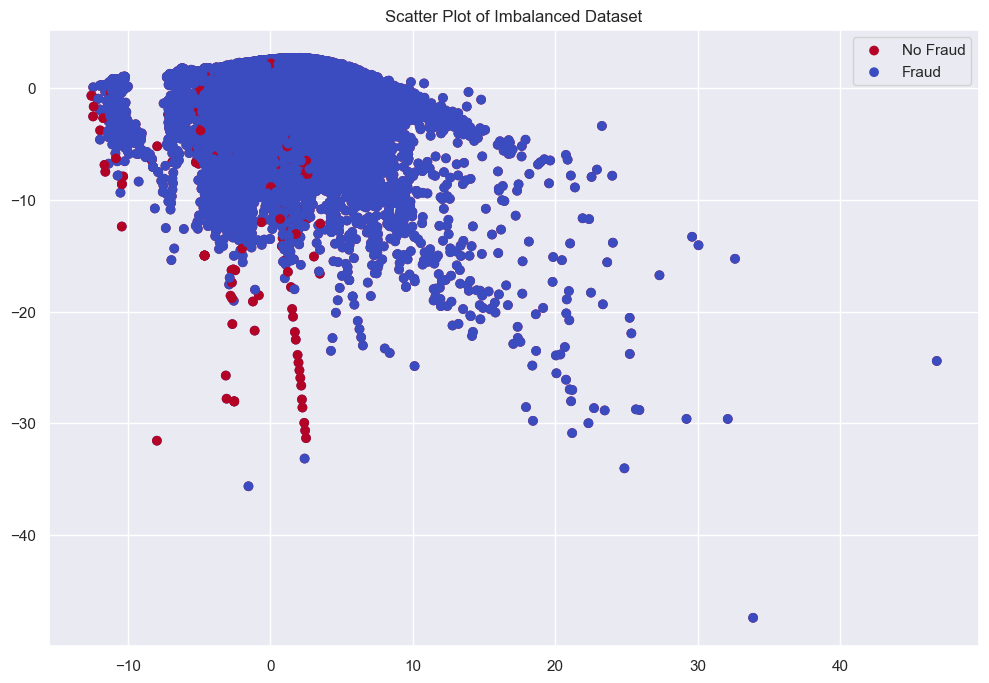

In [194]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

## <a id='distbalds'>Distribution of balaced dataset</a>

Finally, a scatter plot of the transformed dataset is created.

It shows many more examples in the minority class created along the lines between the original examples in the minority class.

In [197]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_smote)

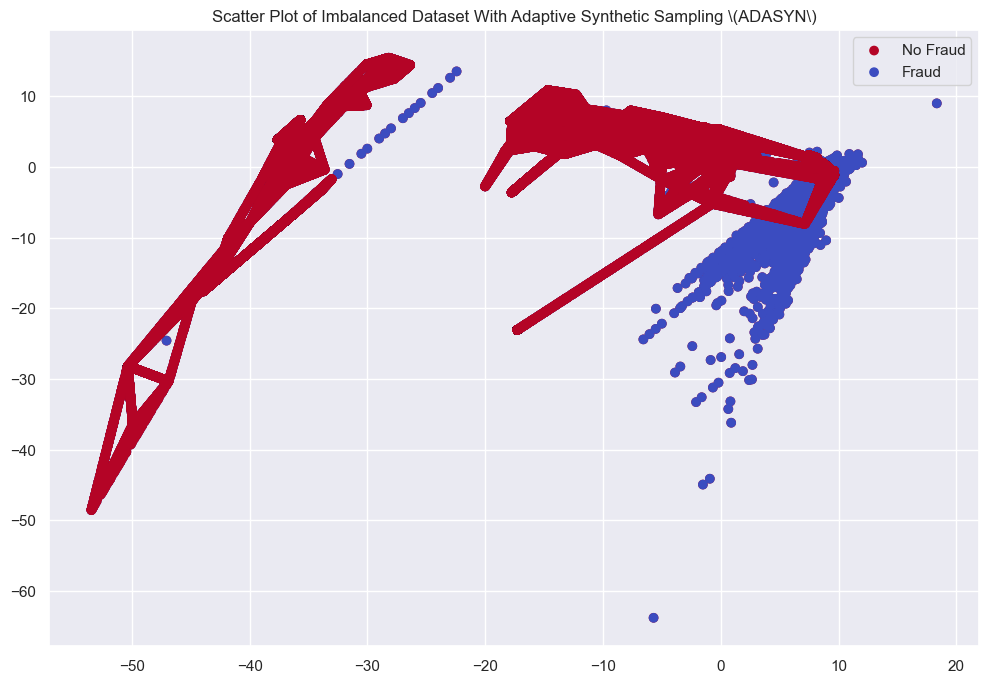

In [199]:
# Oversample and plot imbalanced dataset with ADASYN
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 1), cmap='coolwarm', label='Fraud', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset With Adaptive Synthetic Sampling \(ADASYN\)")
plt.legend()
plt.show()

# <a id='modelwith'>Building different models with different balanced datasets</a>
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [203]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

### Logistic Regression (LR)

Model Name : LR imbalance
Train Accuracy :0.99916
Test Accuracy :0.99920
Train AUC : 0.80452
Test AUC : 0.80549
Train Precision : 0.87243
Test Precision : 0.88000
Train Recall : 0.60920
Test Recall : 0.61111
Train F1 : 0.71743
Test F1 : 0.72131
Confusion Matrix : 
 [[85287    12]
 [   56    88]]


Model Name : LR Undersampling
Train Accuracy :0.94971
Test Accuracy :0.97252
Train AUC : 0.94971
Test AUC : 0.94117
Train Precision : 0.97568
Test Precision : 0.05312
Train Recall : 0.92241
Test Recall : 0.90972
Train F1 : 0.94830
Test F1 : 0.10038
Confusion Matrix : 
 [[82964  2335]
 [   13   131]]


Model Name : LR Oversampling
Train Accuracy :0.95325
Test Accuracy :0.97799
Train AUC : 0.95325
Test AUC : 0.93698
Train Precision : 0.97630
Test Precision : 0.06466
Train Recall : 0.92906
Test Recall : 0.89583
Train F1 : 0.95209
Test F1 : 0.12062
Confusion Matrix : 
 [[83433  1866]
 [   15   129]]


Model Name : LR SMOTE
Train Accuracy :0.94666
Test Accuracy :0.97604
Train AUC : 0.94666
Test AU

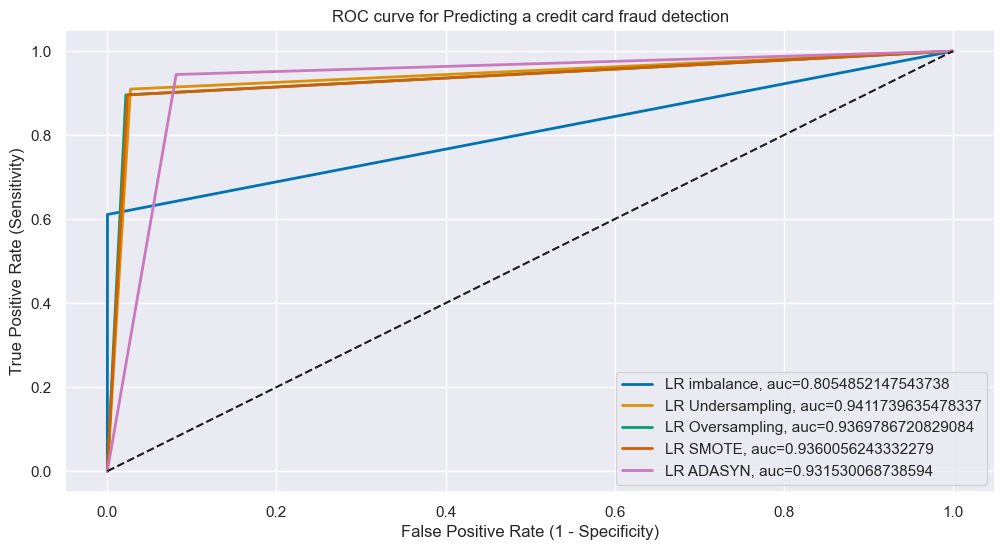

In [205]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'), X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

### Decision Tree (DT)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :0.99913
Train AUC : 1.00000
Test AUC : 0.88518
Train Precision : 1.00000
Test Precision : 0.73026
Train Recall : 1.00000
Test Recall : 0.77083
Train F1 : 1.00000
Test F1 : 0.75000
Confusion Matrix : 
 [[85258    41]
 [   33   111]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :0.89712
Train AUC : 1.00000
Test AUC : 0.89648
Train Precision : 1.00000
Test Precision : 0.01449
Train Recall : 1.00000
Test Recall : 0.89583
Train F1 : 1.00000
Test F1 : 0.02851
Confusion Matrix : 
 [[76524  8775]
 [   15   129]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99926
Train AUC : 1.00000
Test AUC : 0.84018
Train Precision : 1.00000
Test Precision : 0.85217
Train Recall : 1.00000
Test Recall : 0.68056
Train F1 : 1.00000
Test F1 : 0.75676
Confusion Matrix : 
 [[85282    17]
 [   46    98]]


Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99788
Train AUC : 1.00000
Test AU

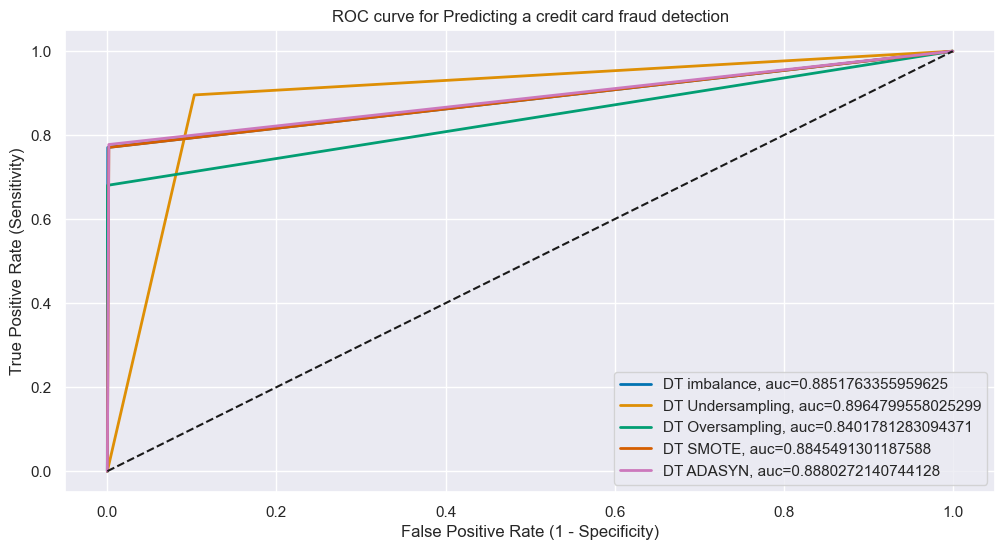

In [272]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

### Random Forest (RF)

In [ ]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

In [ ]:
# #------------------ K-Nearest Neighbors (KNN) ------------------#
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

In [ ]:
# #------------------ Support Vector Machines (SVM) ------------------#
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

### Naive Bayes (NB)

In [ ]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NBmodels.append(('NB Oversampling', GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

### Performance measures of various classifiers

In [ ]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

# <a id='concl'>Conclusion</a>

We were able to accurately identify fraudulent credit card transactions using a random forest model with oversampling technique. We, therefore, chose the random forest model with oversampling technique as the better model, which obtained highest F1 score of 86.47%   on the test set.

